steps to create nn

- Design model (input, output,size, forward pass)
- Construct loss and optimiser
- Training loop
  - forward pass: compute prediction
  - backward pass: gradients
  - update the weights and iterate the loop

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


data prep

In [2]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [3]:
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))



In [4]:
y

tensor([-126.2492,   50.9288,   63.1546,    6.0547,   -5.7295,   -2.7519,
          58.7036,   53.8136,  -95.3411,   24.6481,  -59.4170,  -73.4235,
        -104.1627,   31.8077,  171.1535,  -67.7520,  141.4677,  -24.3676,
          -2.1124,  -32.5958,  -29.4151,  -37.8715, -101.8983,   46.4129,
        -181.3484,  -31.7740,   24.1315,  163.9438,   10.7737,   37.3589,
           0.9804, -120.8857,  138.1994,    9.2027,  -16.2069,   33.2171,
         -45.6170,   -1.7776, -105.5628,    5.2639,   89.5979,  146.1030,
         -77.7870,   -3.8089,   60.8120,  -97.2027,   -1.1599,  -43.8825,
          15.7428,  -24.2745,  -90.6015,  -19.0731, -101.7900,  -56.5514,
          52.1697, -158.2847,   64.5397,   84.5210,   66.4343,   36.8660,
          37.4378,  -82.9171,  -21.4183,   -5.5435,   59.8845,    8.3785,
         -17.1763, -160.5090, -100.7372,   80.3034,   69.6496,   28.1444,
           9.7630,   41.1250,  176.9283,    9.5598,   -4.4046,  -24.0359,
          19.1701,  102.4833,  101.520

In [5]:
y = y.view(y.shape[0],1)

In [6]:
y

tensor([[-126.2492],
        [  50.9288],
        [  63.1546],
        [   6.0547],
        [  -5.7295],
        [  -2.7519],
        [  58.7036],
        [  53.8136],
        [ -95.3411],
        [  24.6481],
        [ -59.4170],
        [ -73.4235],
        [-104.1627],
        [  31.8077],
        [ 171.1535],
        [ -67.7520],
        [ 141.4677],
        [ -24.3676],
        [  -2.1124],
        [ -32.5958],
        [ -29.4151],
        [ -37.8715],
        [-101.8983],
        [  46.4129],
        [-181.3484],
        [ -31.7740],
        [  24.1315],
        [ 163.9438],
        [  10.7737],
        [  37.3589],
        [   0.9804],
        [-120.8857],
        [ 138.1994],
        [   9.2027],
        [ -16.2069],
        [  33.2171],
        [ -45.6170],
        [  -1.7776],
        [-105.5628],
        [   5.2639],
        [  89.5979],
        [ 146.1030],
        [ -77.7870],
        [  -3.8089],
        [  60.8120],
        [ -97.2027],
        [  -1.1599],
        [ -43

In [7]:
x.shape

torch.Size([100, 1])

In [8]:
n_samples, n_features = x.shape

model

In [9]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

loss and optimizer

In [10]:
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

training loop

In [11]:
num_epochs =100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if(epoch+1)%10 ==0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
        

epoch: 10, loss = 4084.5276
epoch: 20, loss = 2878.0391
epoch: 30, loss = 2055.5334
epoch: 40, loss = 1494.6842
epoch: 50, loss = 1112.1731
epoch: 60, loss = 851.2397
epoch: 70, loss = 673.2059
epoch: 80, loss = 551.7107
epoch: 90, loss = 468.7831
epoch: 100, loss = 412.1696


In [12]:
predicted = model(x).detach().numpy()

plot

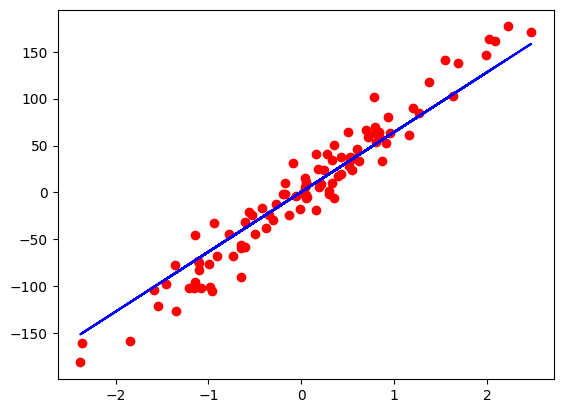

In [13]:

plt.plot(x_numpy, y_numpy,'ro')
plt.plot(x_numpy, predicted,'b')
plt.show()